In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def loadDataSet():
    dataMat = []
    labelMat = []
    
    fr = open('../MLiA_SourceCode/Ch05/testSet.txt')
    
    for line in fr.readlines():
        lineArr = line.strip().split()
        
        dataMat.append([1.0 , float(lineArr[0]) , float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    
    return dataMat , labelMat

def sigmoid(inX):
    return 1.0 / (1+np.exp(-inX))

def gradAscent(dataMatIn , classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).T
    m , n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n , 1))
    
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        
        error = labelMat - h
        weights = weights + alpha*dataMatrix.T*error
    
    return weights

In [10]:
dataArr , labelMat = loadDataSet()
weights = gradAscent(dataArr , labelMat)

In [24]:
#绘制分割线图形
def plotBestFit(weights):
    dataMat , labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    
    n = dataArr.shape[0]
    
    xcord1 = [] ; ycord1 = []
    xcord2 = [] ; ycord2 = []

    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1 , ycord1 , s=30 , c='red' , marker = 's')
    ax.scatter(xcord2 , ycord2 , s=30 , c='green')
    x = np.arange(-3. , 3. , 0.1)
    x=np.mat(x) #add extra
    y = (-weights[0]-weights[1]*x)/weights[2]

    ax.plot(x,y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show


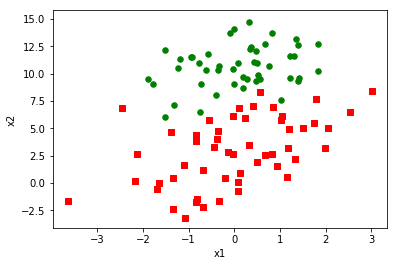

In [25]:
plotBestFit(weights)

In [39]:
def stocGradAscent0(dataMatrix , classLabels):
    m ,n = np.shape(dataMatrix)
    alpha = 0.01
    
    weights = np.ones(n)
    
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i].T * weights))
        error = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    
    return weights


In [40]:
dataArr , labelMat = loadDataSet()
weights = stocGradAscent0(np.mat(dataArr) , labelMat)

In [44]:
def stocGradAscent1(dataMatrix , classLabels , numIter = 150):
    m , n = dataMatrix.shape
    weights = np.ones(n)
    
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i) + 0.01
            
            randIndex = int(np.random.uniform(0 , len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            
            error = classLabels[randIndex] - h
            weights = weights + alpha*error*dataMatrix[randIndex]
            
            del(dataMatrix[randIndex])
        
    return weights

weights = stocGradAscent0(np.mat(dataArr) , labelMat)

In [45]:
weights

matrix([[ 0.87289381,  0.99746585, -2.02301285]])